# Crop Yield Recommendation and Prediction using machine Learning

Looking forward to work with the data set related to the agricultural field in India.
The main aim of the exploration is to analyse the data properly, Understand the pattern of the
data and use the machine learning algorithms to predict the future production of crop and to suggest
the farmers about the suitable crop in the particular season.



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Importing data files.

I have taken an indian crop production dataset.

### Crop data

In [2]:
crop_data = pd.read_csv('data/cropDB.csv')
column_names=['crop_name','no_of_months','min_temp','max_temp','min_ph','max_ph','min_rainfall','max_rainfall','n','p','k']
crop_data.columns=column_names
crop_data.head()

,crop_name,no_of_months,min_temp,max_temp,min_ph,max_ph,min_rainfall,max_rainfall,n,p,k
0,Banana,4,15,35,6.5,8.5,450,750,M,VL,VL
1,Barley,4,12,32,3.0,8.0,800,1100,VL,VL,M
2,Bean,2,14,32,5.5,6.5,300,500,L,VL,M
3,Black pepper,6,23,33,5.5,6.5,1200,2500,H,VL,M
4,Blackgram,2,23,35,5.0,7.0,500,700,L,H,VL


what the headings of the table means??

* crop_name = Name of the crop
* no_of_month = Total number of month that the crop exists or its overall life cycle.
* min_temp = Minimum Temperature needed to grow the crop
* max_temp = Maximum Temperature needed to grow the crop
* min_ph = Minimum Ph value 
* max_ph = Maximum Ph value
(Most soils have pH values between 3.5 and 10. In higher rainfall areas the natural pH of soils typically ranges from 5 to 7, while in drier areas the range is 6.5 to 9. Soils can be classified according to their pH value: 6.5 to 7.5—neutral)
* min_rainfall = Minimum rainfall
* max_rainfall = Maximum Rainfall
* n = Nitrogen
* p = phosphorous
* k = potassium


(L=Low,VL = Very Low, M=Medium,H=High)

In [3]:
crop_data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_months,55.0,4.327273,2.055296,2.0,3.0,4.0,5.0,12.0
min_temp,55.0,17.672727,4.451610,7.0,15.0,18.0,20.0,25.0
max_temp,55.0,32.454545,3.705942,23.0,30.0,33.0,35.0,40.0
min_ph,55.0,5.480000,0.691322,3.0,5.0,5.5,6.0,7.0
max_ph,55.0,7.452727,0.739082,6.4,7.0,7.5,8.0,10.0
min_rainfall,55.0,615.909091,317.665225,100.0,425.0,500.0,725.0,1500.0
max_rainfall,55.0,1095.454545,637.070315,300.0,725.0,900.0,1150.0,4000.0


Here we can clearly see that we have 55 values for each and the other values that matters in the yielding.

### Rainfall Data

In [4]:
rainfall_data = pd.read_csv('data/temprainfall.csv')
cols = ['City','State','Month','Max_temp','Min_temp','Rainfall']
rainfall_data.columns=cols
rainfall_data.head()

,City,State,Month,Max_temp,Min_temp,Rainfall
0,Bangalore,Karnataka,February,30.1,16.6,7.9
1,Bangalore,Karnataka,March,32.8,19.0,10.0
2,Bangalore,Karnataka,April,33.9,21.3,43.9
3,Bangalore,Karnataka,May,33.1,21.1,111.9
4,Bangalore,Karnataka,June,29.4,19.8,79.7


What the rainfall data heading mean?

* City = Name of the indian city
* State = Name of the state
* Month = name of months 
* max_temp = Maximum temperature in a given month
* min_temp = Minimum temperature in a given moth
* Rainfall = Amount of rainfall in a given moth

In [5]:
rainfall_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_temp,239.0,29.527197,6.016425,5.0,27.90,30.2,32.8,41.4
Min_temp,239.0,18.716318,6.475281,-2.3,14.45,20.8,23.6,27.9
Rainfall,239.0,123.331799,178.756973,0.1,16.20,55.1,159.9,1200.4


Here we have 239 values in each of the columns in our dataset.

In [6]:
print('The total number of state we have in our data: ',
      len(rainfall_data['State'].unique()),
      '\n\n',
      rainfall_data['State'].unique())

The total number of state we have in our data:  16 

 ['Karnataka' 'Uttar Pradesh' 'Punjab' 'Tamilnadu' 'Uttarkhand' 'Assam'
 'Madhya Pradesh' 'Jammu and Kashmir' 'West Bengal' 'Goa'
 'Andaman and Nicobar' 'Maharashtra' 'Gujarat' 'Jharkhand'
 'Himachal Pradesh' 'Kerala']


### Nutrients data

In [7]:
nutrients_data = pd.read_csv('data/nutrientsarea.csv')
col_names = ['State','n','p','k','ph']
nutrients_data.columns = col_names
nutrients_data.head()

,State,n,p,k,ph
0,Andhra Pradesh,H,VH,M,6.3
1,Arunachal Pradesh,H,M,M,5.6
2,Assam,M,L,VL,6.5
3,Bihar,VL,VH,H,6.0
4,Goa,M,VL,M,5.4


What the nutrients data headings mean?

* State = name of the indian state
* n = Amount of Nitrogen
* p = Amount of Phosphoros
* k = Amount of Potassium
* ph = ph value

In [8]:
nutrients_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,30.0,6.076667,0.407417,5.0,5.925,6.0,6.275,7.0


### Production Data

In [9]:
production_data = pd.read_csv('data/regressiondb.csv')
production_data.head()

,Rainfall,Temperature,Ph,Crop,Production
0,400.15082,20.0,3.0,Bajra,0.00690
1,400.16331,20.0,3.2,Bajra,0.00747
2,400.16387,20.0,3.2,Bajra,0.00749
3,400.17967,20.0,3.2,Bajra,0.00822
4,400.19582,20.0,3.2,Bajra,0.00895


 What does the production data table headings mean?
* Rainfall = Amount of rainfall
* Temperature = Mean temperature
* Ph = ph value
* Crop = Name of the crop
* Production = Amount of crop produced

In [10]:
production_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,189232.0,693.417573,288.988419,100.00340,516.00000,628.702885,770.00000,3000.00000
Temperature,189232.0,25.262492,4.585660,7.00000,22.02683,25.000000,28.21500,39.04500
Ph,189232.0,6.337846,0.788959,3.00000,5.80000,6.300000,6.90000,8.80000
Production,189232.0,5.262677,14.441616,0.00034,0.58442,1.166670,2.98963,955.75034


This data has 189232 different data values

## Analyzing the crop data.

### Crop v/s Number of month required

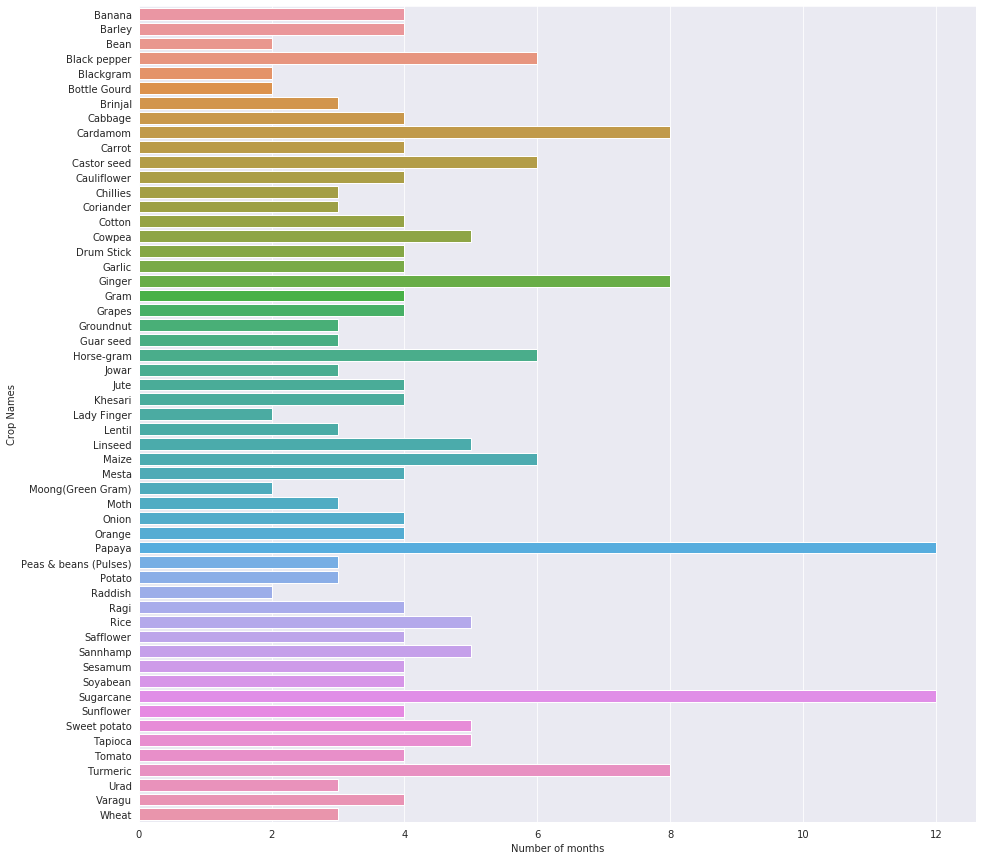

In [11]:
plt.figure(figsize=(15,15))
sns.barplot(x=crop_data['no_of_months'],y=crop_data['crop_name'])
plt.xlabel('Number of months')
plt.ylabel('Crop Names');

### Minimum temperature distribution needed for a crop to grow.

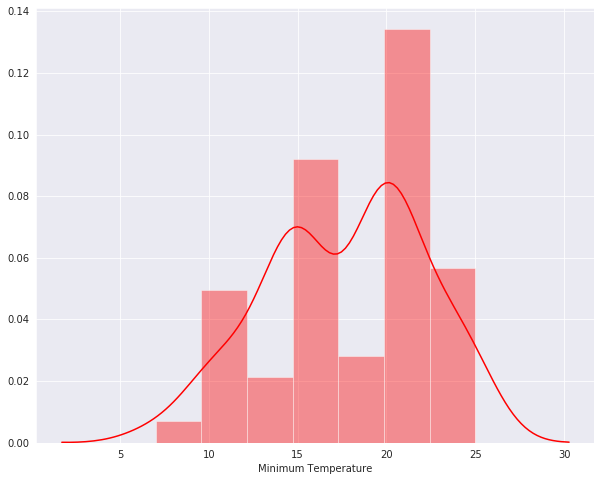

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(crop_data['min_temp'],color='red')
plt.xlabel('Minimum Temperature');

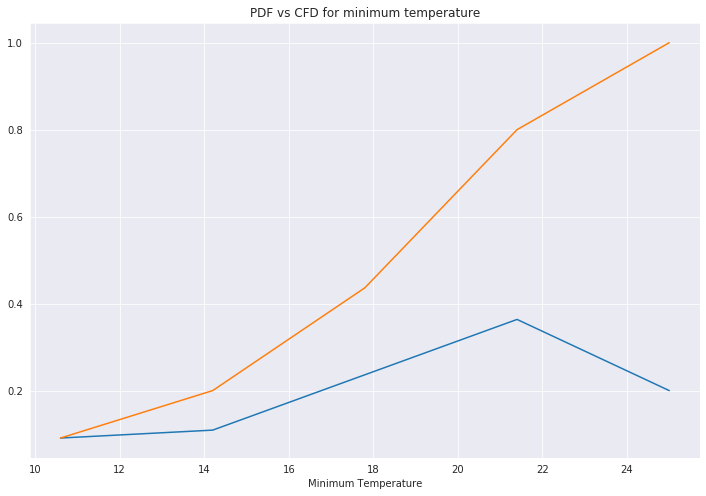

In [13]:
count,edges = np.histogram(crop_data['min_temp'],bins=5,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(12,8))
plt.plot(edges[1:],pdf,label='PDF')
plt.plot(edges[1:],cdf,label='CDF')
plt.xlabel('Minimum Temperature')
plt.title('PDF vs CFD for minimum temperature');

from the figure we can clearly see that 
* about 36% of the crop that are grown in india required the minimum temperature of nearly 21 degree
* about 90% of the crop that are grown in india require the minimum temperature less than or equals to 24 degree. 

## Maximum temperature distribution needed for a crop to grow.

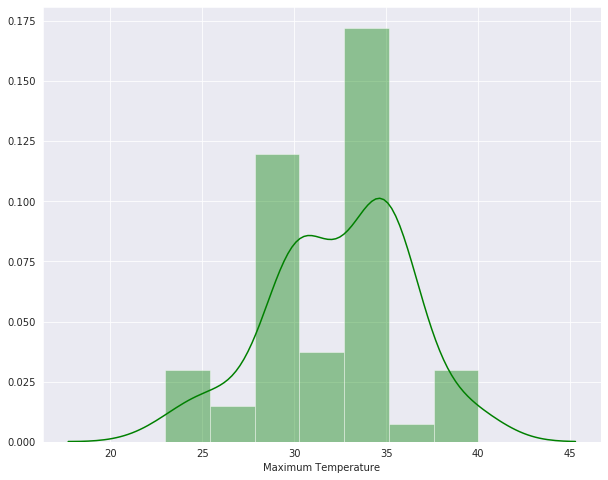

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(crop_data['max_temp'],color='green')
plt.xlabel('Maximum Temperature');

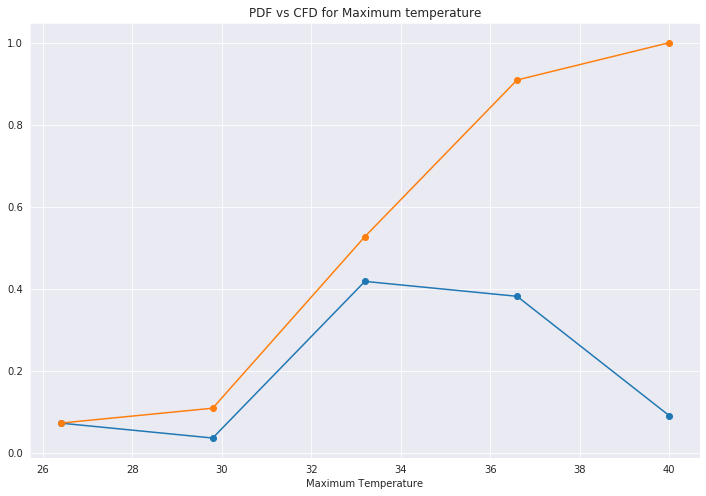

In [15]:
count,edges = np.histogram(crop_data['max_temp'],bins=5,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(12,8))
plt.plot(edges[1:],pdf,label='PDF',marker='o')
plt.plot(edges[1:],cdf,label='CDF',marker='o')
plt.xlabel('Maximum Temperature')
plt.title('PDF vs CFD for Maximum temperature');

Here,from the figure we can clearly see that

about 43% of the crop that are grown in india required the maximum temperature of nearly 33 degree
about 90% of the crop that are grown in india require the maximum temperature less than or equals to 37 degree.

## Minimum Ph distribution needed for a crop to grow.

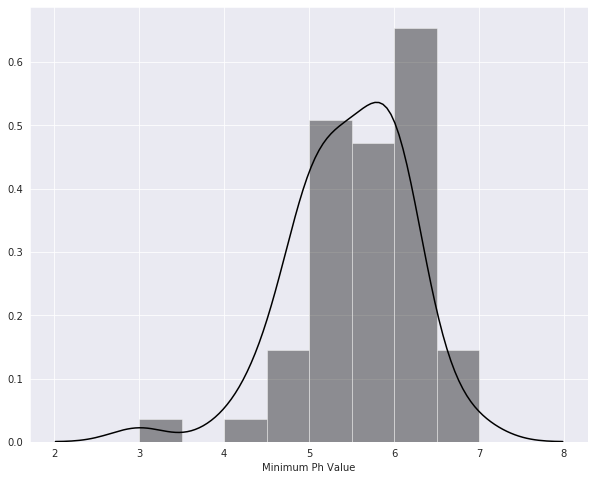

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(crop_data['min_ph'],color='black')
plt.xlabel('Minimum Ph Value');

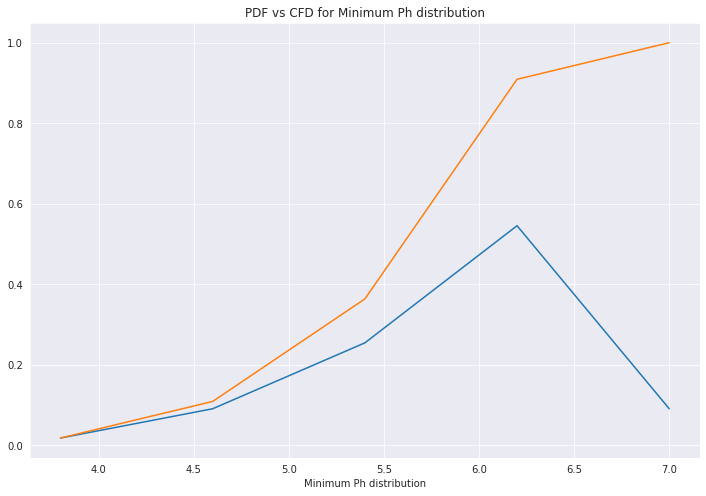

In [17]:
count,edges = np.histogram(crop_data['min_ph'],bins=5,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(12,8))
plt.plot(edges[1:],pdf,label='PDF')
plt.plot(edges[1:],cdf,label='CDF')
plt.xlabel('Minimum Ph distribution')
plt.title('PDF vs CFD for Minimum Ph distribution');

Here,from the figure we can clearly see that

* about 55% of the crop that are grown in india require the minimum ph value of nearly 6.2 
* about 90% of the crop that are grown in india require the minimum ph value less than or equals to 6.5.

## Maximum Ph distribution needed for a crop to grow

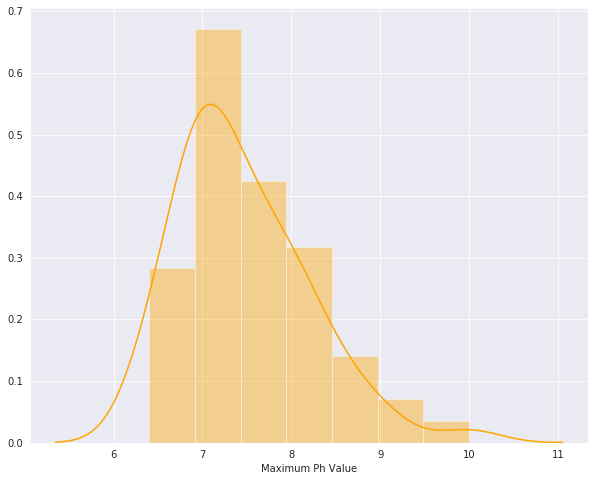

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(crop_data['max_ph'],color='orange')
plt.xlabel('Maximum Ph Value');

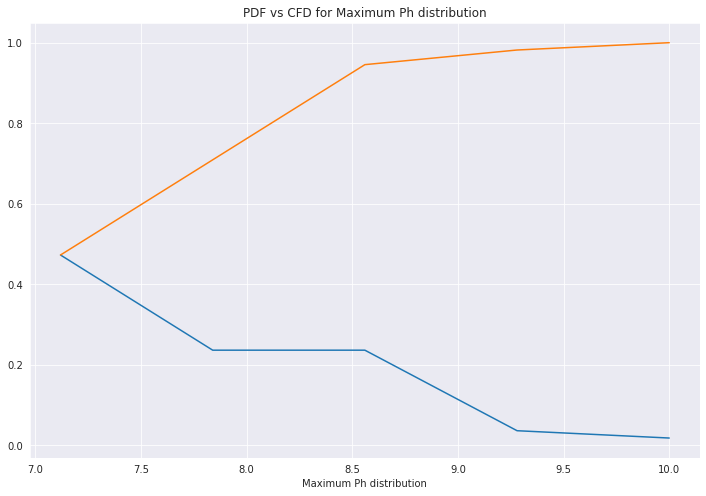

In [19]:
count,edges = np.histogram(crop_data['max_ph'],bins=5,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(12,8))
plt.plot(edges[1:],pdf,label='PDF')
plt.plot(edges[1:],cdf,label='CDF')
plt.xlabel('Maximum Ph distribution')
plt.title('PDF vs CFD for Maximum Ph distribution');

Here the maxium ph required by the plant is 10.



Now we have the certain idea about our data. Let's explore more of it.

## Minimum amount of rainfall needed for a crop to grow

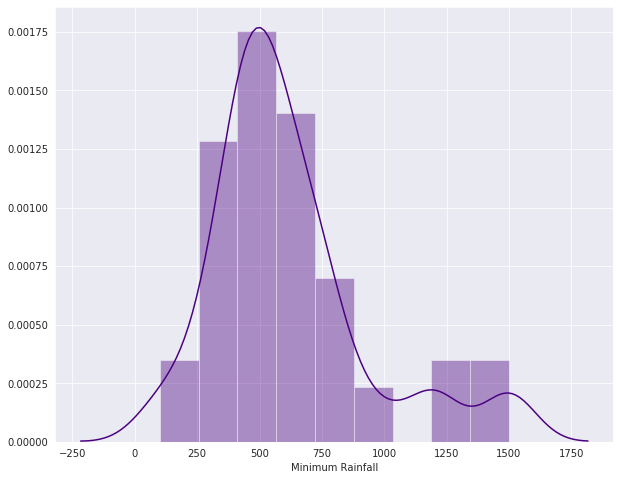

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(crop_data['min_rainfall'],color='indigo')
plt.xlabel('Minimum Rainfall');

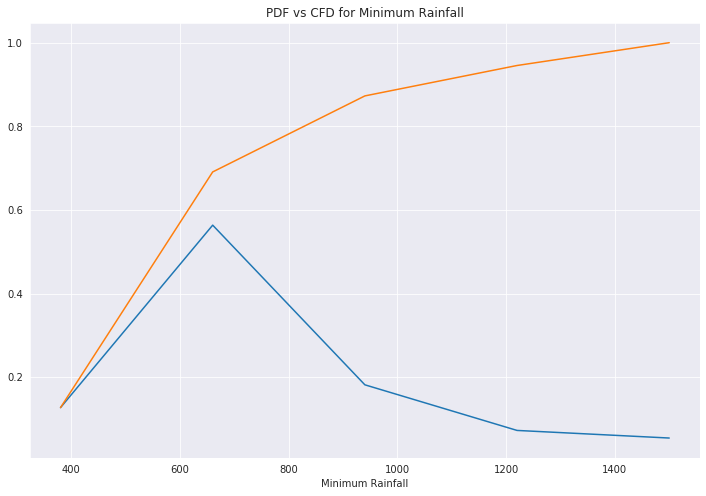

In [21]:
count,edges = np.histogram(crop_data['min_rainfall'],bins=5,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(12,8))
plt.plot(edges[1:],pdf,label='PDF')
plt.plot(edges[1:],cdf,label='CDF')
plt.xlabel('Minimum Rainfall')
plt.title('PDF vs CFD for Minimum Rainfall');

About 90% of the crop require the rainfall of about less than or equals to 1000mm 

## Minimum amount of rainfall needed for a crop to grow

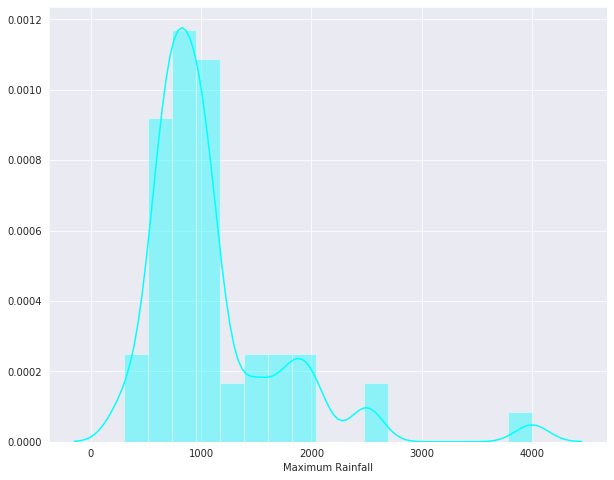

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(crop_data['max_rainfall'],color='cyan')
plt.xlabel('Maximum Rainfall');

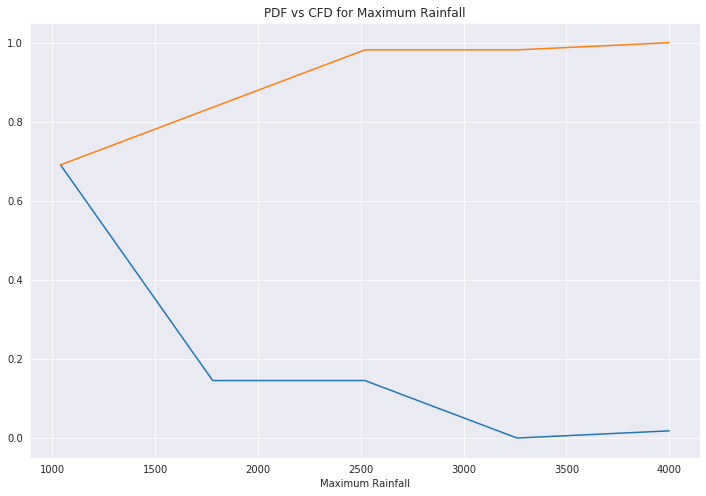

In [23]:
count,edges = np.histogram(crop_data['max_rainfall'],bins=5,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(12,8))
plt.plot(edges[1:],pdf,label='PDF')
plt.plot(edges[1:],cdf,label='CDF')
plt.xlabel('Maximum Rainfall')
plt.title('PDF vs CFD for Maximum Rainfall');

For 98% of the crops a max rainfall ≤ 2500mm is sufficient.

## Required level of Nitrogen needed for crops

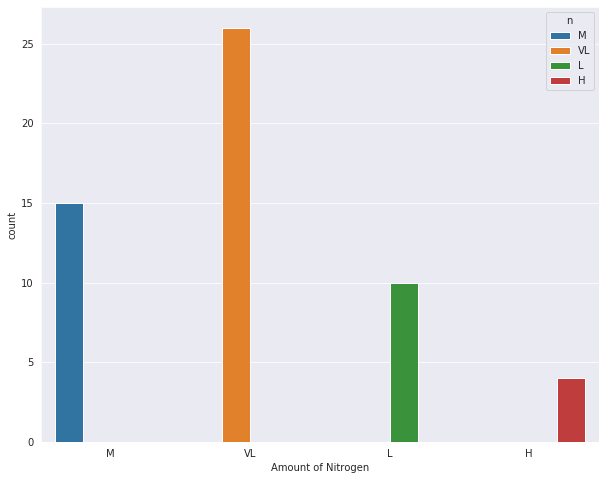

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x=crop_data['n'],hue=crop_data['n'])
plt.xlabel('Amount of Nitrogen');

In [25]:
crop_data['n'].describe()

count     55
unique     4
top       VL
freq      26
Name: n, dtype: object

From the above chart,
maximum crops needs very low amount of nitrogen. out of 55 crops 26 need very low amount of nitrogen. 10 need low, 15 need high and only 4 crop needs high amount of nitrogen

## Required level of Phosphorous needed for crops

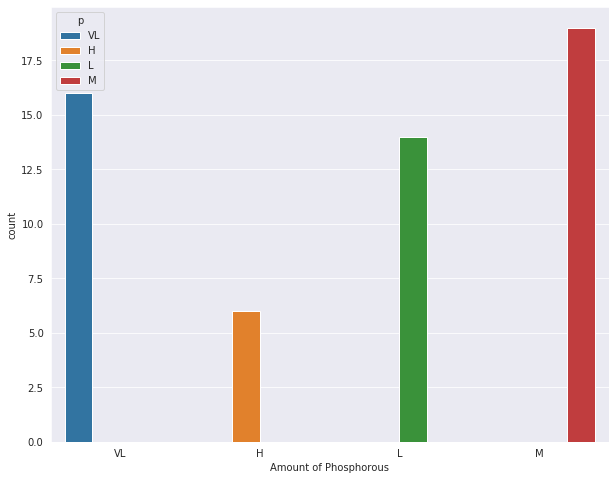

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x=crop_data['p'],hue=crop_data['p'])
plt.xlabel('Amount of Phosphorous');

In [27]:
crop_data['p'].describe()

count     55
unique     4
top        M
freq      19
Name: p, dtype: object

From the above chart, maximum crops needs medium amount of Phosphorous. out of 55 crops 19 need medium amount of Phosphorous. About 14 need low, about 6 need high and about 16 needs very low amount of Phosphorous.

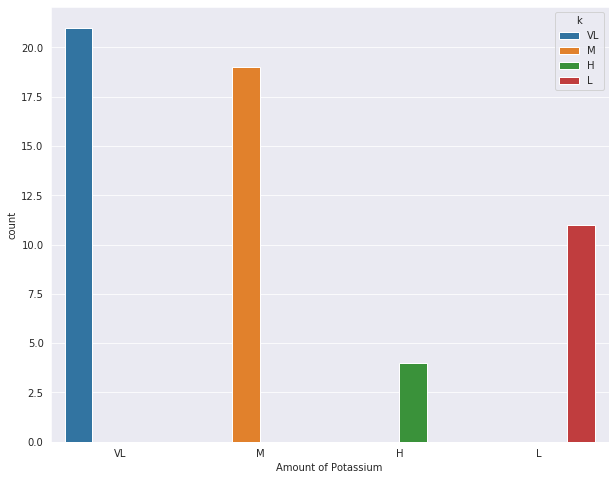

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x=crop_data['k'],hue=crop_data['k'])
plt.xlabel('Amount of Potassium');

In [29]:
crop_data['k'].describe()

count     55
unique     4
top       VL
freq      21
Name: k, dtype: object

From the above chart, maximum crops needs very low amount of Potassium. out of 55 crops 21 need very low amount of potassium. About 11 need low, about 4 need high and about 19 needs high amount of Phosphorous.

# Analyzing the rainfall data

let's start with the temperature of Pune.

In [30]:
city = rainfall_data[rainfall_data.City=='Pune ']
city.head()

,City,State,Month,Max_temp,Min_temp,Rainfall
155,Pune,Maharashtra,January,30.2,11.6,1.6
156,Pune,Maharashtra,February,32.3,12.7,1.1
157,Pune,Maharashtra,March,35.8,16.3,2.7
158,Pune,Maharashtra,April,37.9,20.1,13.6
159,Pune,Maharashtra,May,37.2,22.3,33.3


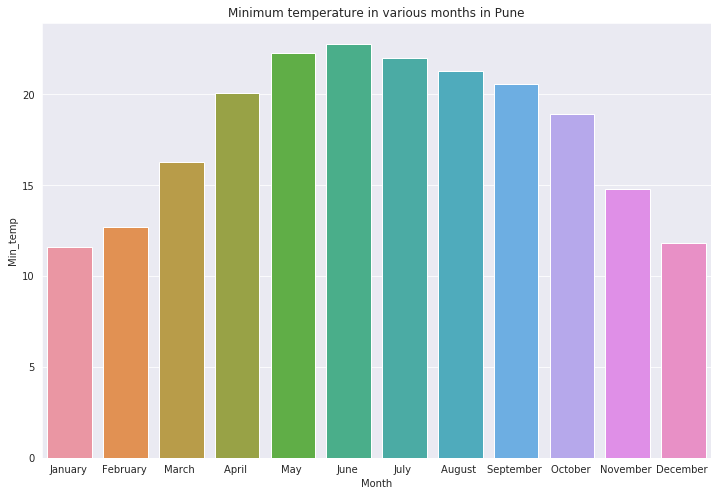

In [31]:
plt.figure(figsize=(12,8))
plt.title("Minimum temperature in various months in Pune")
sns.barplot(data=city,x='Month',y='Min_temp');

Here january-february have the lowest temperature throughout the year which is about 12-13 degrees.

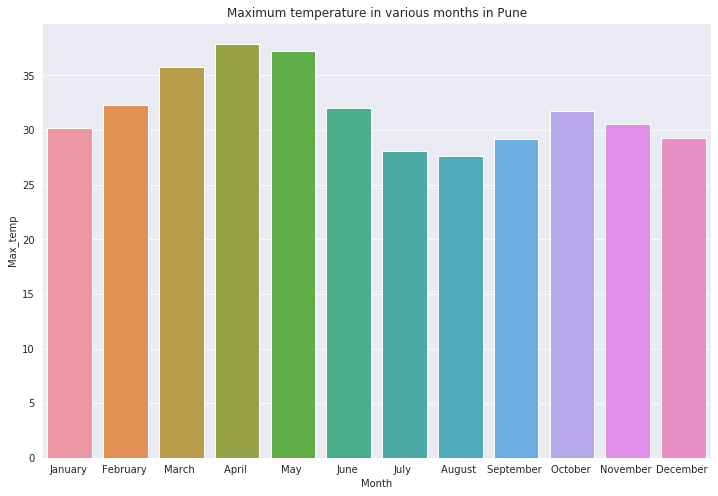

In [32]:
plt.figure(figsize=(12,8))
plt.title("Maximum temperature in various months in Pune")
sns.barplot(data=city,x='Month',y='Max_temp');

Here April-may have the highest temperature throughout the year which is about 38 degrees.

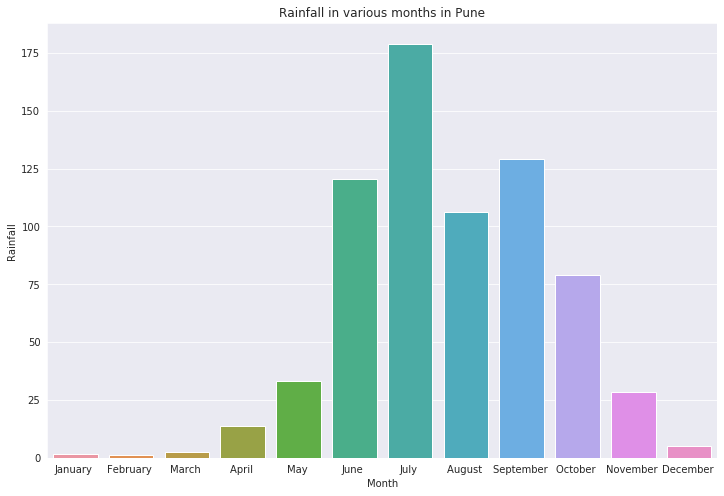

In [33]:
plt.figure(figsize=(12,8))
plt.title("Rainfall in various months in Pune")
sns.barplot(data=city,x='Month',y='Rainfall');

July is the month having the maximum amount of rainfall in Pune.

# Analyzing the nutrients data

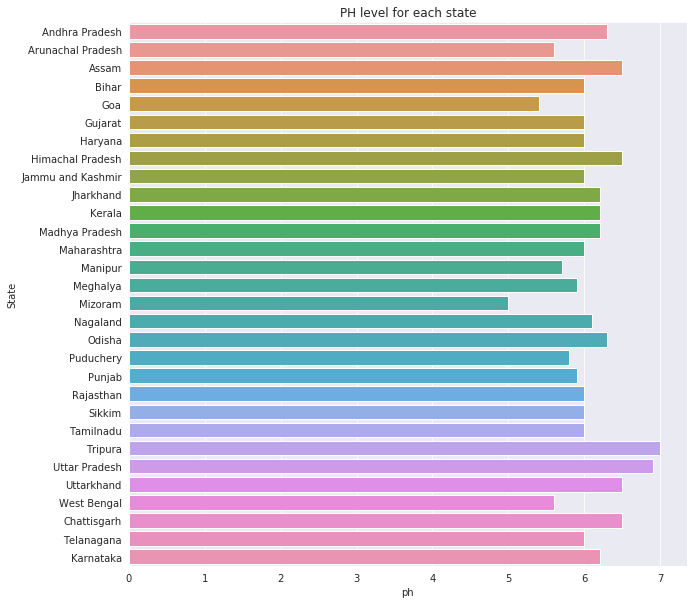

In [34]:
plt.figure(figsize=(10,10))
plt.xlabel("Ph value")
plt.ylabel("State")
plt.title("PH level for each state")
sns.barplot(data=nutrients_data,x='ph',y='State');

In [35]:
rainfall_data['State'].unique()

array(['Karnataka', 'Uttar Pradesh', 'Punjab', 'Tamilnadu', 'Uttarkhand',
       'Assam', 'Madhya Pradesh', 'Jammu and Kashmir', 'West Bengal',
       'Goa', 'Andaman and Nicobar', 'Maharashtra', 'Gujarat',
       'Jharkhand', 'Himachal Pradesh', 'Kerala'], dtype=object)

In [36]:
rainfall_data['City'].unique()

array(['Bangalore ', 'Bareilly ', 'Bhatinda ', 'Coimbatore ', 'DehraDun ',
       'Guwahati ', 'Jabalpur ', 'Jammu ', 'Kolkata ', 'Mangalore ',
       'Mysore ', 'Panjim ', 'PortBlair ', 'Pune ', 'Rajkot ', 'Ranchi ',
       'Shimla ', 'Srinagar ', 'Thiruvananthapuram ', 'Varanasi '],
      dtype=object)

This bar can fully determine the amount of ph values present in each states.

# Crop Recommendation

In [37]:
city_name = input()+str(' ')

Pune


In [38]:
state_name = input()

Goa


### Getting appropriate crops based on the climatic conditions of the suitable cities

In [39]:
min_temp_for_crop = crop_data['min_temp'].values
max_temp_for_crop = crop_data['max_temp'].values
min_rainfall_for_crop = crop_data['min_rainfall'].values
max_rainfall_for_crop = crop_data['max_rainfall'].values
city = rainfall_data[rainfall_data['City']==city_name]
city_max_temp = city['Max_temp'].values
city_min_temp = city['Min_temp'].values
city_rainfall = city['Rainfall'].values
crop_index1=[]
temp=[]
month_index1={}
for i in range(len(city_max_temp)):
    temp=[]
    for j in range(len(min_rainfall_for_crop)):
        if city_rainfall[i]>=min_rainfall_for_crop[j] and city_rainfall[i]<=max_rainfall_for_crop[j]:
            if (city_max_temp[i]<=max_temp_for_crop[j]) and city_min_temp[i]>=min_temp_for_crop[j]:
                crop_index1.append(j)
                temp.append(j)
        month_index1[i]=temp

### Getting appropriate crops according to states current nitrogen,phosphorous, potassium levels

In [40]:
crop_n_level = crop_data['n'].values 
crop_p_level = crop_data['p'].values
crop_k_level = crop_data['k'].values
state_n_value = nutrients_data[nutrients_data['State']==state_name].n
state_p_value = nutrients_data[nutrients_data['State']==state_name].p
state_k_value = nutrients_data[nutrients_data['State']==state_name].k
state_ph_level = nutrients_data[nutrients_data['State']==state_name].ph
crop_index2=[]
count=0
for i in range(len(crop_k_level)):
    if crop_k_level[i]==str(state_k_value.values[0]):
        count+=1
    if crop_p_level[i]==str(state_p_value.values[0]):
        count+=1
    if crop_n_level[i]==str(state_n_value.values[0]):
        count+=1
    if crop_data.min_ph.values[i]<=state_ph_level.values[0] and crop_data.max_ph.values[i]<=state_ph_level.values[0]:
        count+1
    if count>1:
        crop_index2.append(i)
    count=0

## Suggesting best values based on production levels

In [41]:
crop_recommendations1=[]
crop_recommendations2=[]
for i in crop_index1:
    crop_recommendations1.append(crop_data['crop_name'].values[i])
for i in crop_index2:
    crop_recommendations2.append(crop_data['crop_name'].values[i])

### Crop recommendation based on climatic condition

In [42]:
print("The best crop recommendations based on the climatic conditions for the {0} state and {1} city are : \n".format(state_name,city_name))
print(np.unique(crop_recommendations1))

The best crop recommendations based on the climatic conditions for the Goa state and Pune  city are : 

['Cauliflower']


### Crop recommendation based on Soil condition

In [43]:
print("The best crop recommendations based on the soil for the {0} state and {1} city are : \n".format(state_name,city_name))
print(np.unique(crop_recommendations2))

The best crop recommendations based on the soil for the Goa state and Pune  city are : 

['Banana' 'Barley' 'Bean' 'Black pepper' 'Cabbage' 'Carrot' 'Cauliflower'
 'Cotton' 'Mesta' 'Soyabean' 'Turmeric']


## Getting Producton rate of above crops

In [44]:
avg_temp = (city_min_temp + city_max_temp)/2
avg_temp = sum(avg_temp)/12
ph_value = nutrients_data[nutrients_data.State==state_name].ph.values[0]


#spliting the data into X and y
X = production_data.drop([' Production',' Rainfall'],axis=1)
y = production_data[' Production']
crop_names = np.unique(X['Crop'].values)

#spliting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((132462, 3), (56770, 3), (132462,), (56770,))

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

vectorizer = CountVectorizer()
vectorizer.fit(X_train.Crop)
x_train_crop = vectorizer.transform(X_train.Crop)
x_test_crop = vectorizer.transform(X_test.Crop)

In [46]:
train_x = hstack((X_train[' Temperature'].values.reshape(-1,1),X_train[' Ph'].values.reshape(-1,1),x_train_crop)).tocsr()
test_x = hstack((X_test[' Temperature'].values.reshape(-1,1),X_test[' Ph'].values.reshape(-1,1),x_test_crop)).tocsr()

In [47]:
model = RandomForestRegressor()
model.fit(train_x,y_train)
print('Training Score: ',model.score(train_x,y_train))
print('Testing Score: ',model.score(test_x,y_test))

Training Score:  0.937226756215122
Testing Score:  0.9107860836467252


In [48]:
x = production_data.drop([' Production',' Rainfall'],axis=1)
y = production_data[' Production'].values

In [49]:
l = LabelEncoder()
l.fit(x.Crop)
x['Crop'] = l.transform(x.Crop)

In [50]:
mappings = pd.DataFrame()
mappings['Crop'] = crop_names
mappings['Value'] = l.transform(crop_names)

In [51]:
mappings

,Crop,Value
0,Bajra,0
1,Banana,1
2,Barley,2
3,Bean,3
4,Black pepper,4
5,Blackgram,5
6,Bottle Gourd,6
7,Brinjal,7
8,Cabbage,8
9,Cardamom,9


The total names of the crop with their values in the right.

Now let's use the random forest to train our model. 

In [52]:
rg = RandomForestRegressor()
rg.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
temp =[]
y_pred=0
print("For the state {0} and city {1} the following are crop recommendations and thier production rate :\n\n".format(state_name,city_name))
for i in range(len(crop_recommendations1)):
    temp=[]
    y_pred=0
    temp.append(avg_temp)
    temp.append(ph_value)
    temp.append(l.transform([crop_recommendations1[i]])[0])
    y_pred = rg.predict(np.array(temp).reshape(1,-1))
    print("Crop : {0} \t\t Predicted production_rate : {1}".format(crop_recommendations1[i],y_pred))

For the state Goa and city Pune  the following are crop recommendations and thier production rate :


Crop : Cauliflower 		 Predicted production_rate : [0.34296467]
Crop : Cauliflower 		 Predicted production_rate : [0.34296467]
Crop : Cauliflower 		 Predicted production_rate : [0.34296467]


As the algorithm predict the cauliflower as the correct choice for the current wheather. The production rate is predicted to be nearly 0.35.

In [54]:
temp =[]
y_pred=0
print("For the state {0} and city {1} the following are crop recommendations and thier production rate :\n\n".format(state_name,city_name))
for i in range(len(crop_recommendations2)):
    temp=[]
    y_pred=0
    temp.append(avg_temp)
    temp.append(ph_value)
    temp.append(l.transform([crop_recommendations2[i]])[0])
    y_pred = rg.predict(np.array(temp).reshape(1,-1))
    print("Crop : {0} \t\t Predicted production_rate : {1}".format(crop_recommendations2[i],y_pred))

For the state Goa and city Pune  the following are crop recommendations and thier production rate :


Crop : Banana 		 Predicted production_rate : [10.02518421]
Crop : Barley 		 Predicted production_rate : [2.17096896]
Crop : Bean 		 Predicted production_rate : [0.50703132]
Crop : Black pepper 		 Predicted production_rate : [0.46981182]
Crop : Cabbage 		 Predicted production_rate : [13.96520389]
Crop : Carrot 		 Predicted production_rate : [13.67962807]
Crop : Cauliflower 		 Predicted production_rate : [0.34296467]
Crop : Cotton 		 Predicted production_rate : [0.34296467]
Crop : Mesta 		 Predicted production_rate : [7.07697806]
Crop : Soyabean 		 Predicted production_rate : [0.20298524]
Crop : Turmeric 		 Predicted production_rate : [0.58112553]


In the left hand side the name of the crop and at the right hand side the predicted values for the same crops.

In this notebook i first built the crop recommendation system which gives the appropriate suggestions to the farmers looking to the current climatic condition and the condition of soil.

Then i use the same data to predict the total production rate for the crops of the same season with the accuracy of 91%. It means out of total 100% the system only gives 9% error.